In [1]:
import copy

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Operation, IfElseOp
from qiskit.circuit.classical import expr, types

from qiskit.transpiler import PassManager
from LogicalQ.Transpilation.FlattenIfElseOps import FlattenIfElseOpsTask
from qiskit.transpiler.passes import Decompose
from qiskit.converters import dag_to_circuit, circuit_to_dag

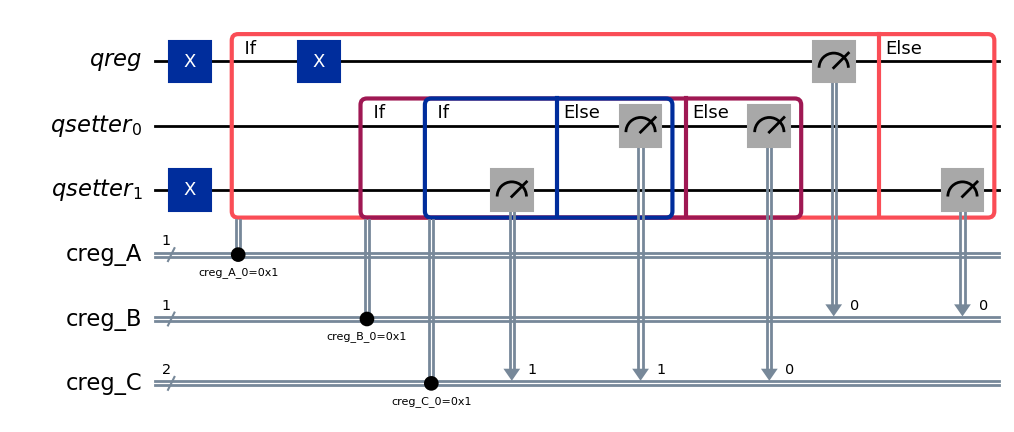

In [3]:
qreg = QuantumRegister(1, name="qreg")
qreg_setter = QuantumRegister(2, name="qsetter")
creg_A = ClassicalRegister(1, name="creg_A")
creg_B = ClassicalRegister(1, name="creg_B")
creg_C = ClassicalRegister(2, name="creg_C")

qc = QuantumCircuit(qreg, qreg_setter, creg_A, creg_B, creg_C)
qc.x(qreg[0])
qc.x(qreg_setter[1])

with qc.if_test((creg_A[0], 1)) as _else_0:
    qc.x(qreg[0])

    with qc.if_test((creg_B[0], 1)) as _else_1:
        with qc.if_test((creg_C[0], 1)) as _else_2:
            qc.measure(qreg_setter[1], creg_C[1])
        with _else_2:
            qc.measure(qreg_setter[0], creg_C[1])
    with _else_1:
        qc.measure(qreg_setter[0], creg_C[0])
    
    qc.measure(qreg[0], creg_B[0])
with _else_0:
    qc.measure(qreg_setter[1], creg_B[0])

qc.draw("mpl")

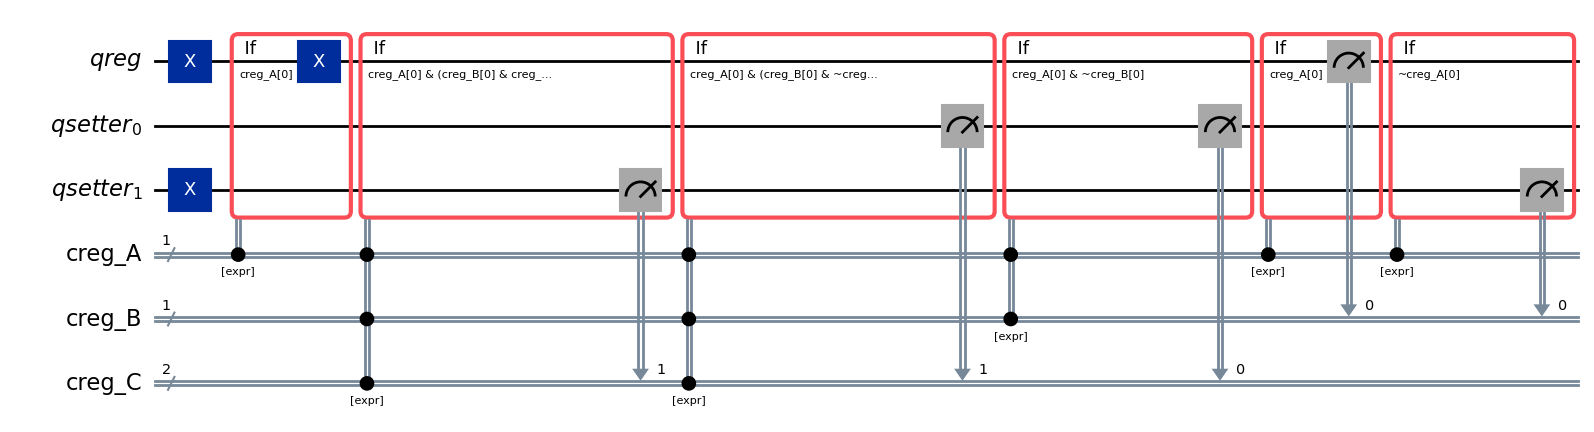

In [4]:
pm = PassManager([FlattenIfElseOpsTask(qreg_setter)])
qc_flattened = pm.run(qc)
qc_flattened.draw("mpl")